# Simple $15~nm$ Quantum Well $Al_{0.3}Ga_{0.7}As$ / $GaAs$ / $Al_{0.3}Ga_{0.7}As$

Activate the project

In [1]:
using Pkg
Pkg.activate("..")

  Activating environment at `~/Documents/repos/kp-lflm-group/Project.toml`


# Load the package KPpack

In [2]:
using KPpack

# Load $8 \times 8 ~~k\cdot p$ bulk model

In [31]:
using Symbolics, LinearAlgebra, LaTeXStrings

In [5]:
#read Hamiltonian created in createHam.ipynb 
dirHam="../Models_Hamiltonian/";name="kane"

Htot=KPpack.readHamiltonian(dirHam,name)

strK=["k_x","k_y","k_z"];
Emomentum=KPpack.setMomentum(strK);
HVar=KPpack.getVar(Htot);

## create finite-differences matrices

In [6]:
var=Emomentum[3] 
H0,H1,H2=KPpack.createKm(Htot,var);

p=HVar[13]; b = HVar[1];
kind="nonSymm"
H1l,H1r=KPpack.createH1Corr(H1,p,b,Emomentum,kind);

## Create a structure

In [10]:
structure=["AlGaAs_0.3" "10";
    "GaAs" "15";
    "AlGaAs_0.3" "10";]

Temp=30;  opt="one"
Npts,layer,nlayer=KPpack.setStructure(structure,1.3,Temp)

X,boundary =KPpack.mesh(Npts,layer,nlayer);
mlayer=Array{KPpack.Materials}(undef, length(X));

boundPoints=KPpack.supParams(layer,X,boundary,mlayer,Temp,opt);
Npts

162

# Plot structure

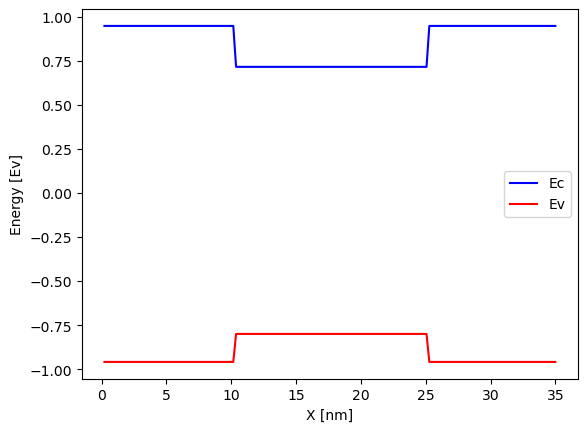

In [11]:
kind="both"
KPpack.plotProf(mlayer,X,kind);

# QW Band Structure Calculation

In [13]:
c=0.038; cps=sqrt(c); dx=X[2]-X[1];  cr=0.9; s=0.5; pb=true; siz=size(H0)[1]
kmax= 0.6; Nt=100;

nc=6; nv=6
@time KqwBand, EcqwBand, EvqwBand, sV,sC,pos, Eqw0, EVqw0 = KPpack.resolveQWbands(mlayer,kmax,Nt,dx,Npts,H0,H1l,H1r,H2,nc,nv,c,cps,siz,Emomentum,pb,cr,s);

 73.336942 seconds (51.42 M allocations: 12.498 GiB, 5.09% gc time)


## Valence Band 

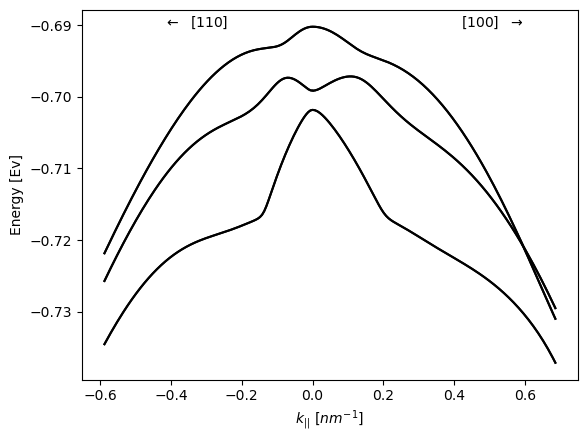

In [14]:
option="complete_V"; poslab=sV
KPpack.PlotQWBand(EvqwBand,EcqwBand,KqwBand,option,poslab,kmax);

## Conduction Band

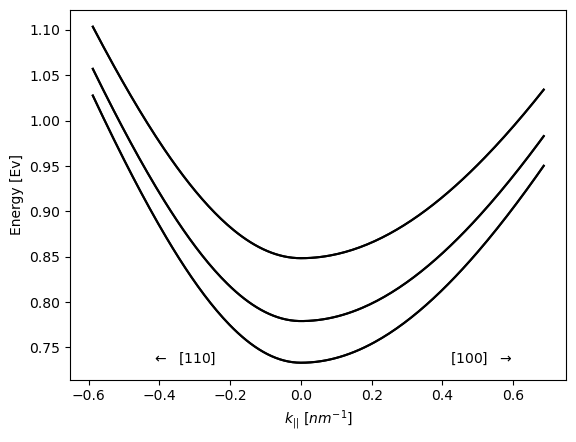

In [15]:
option="complete_C"; poslab=sC
KPpack.PlotQWBand(EvqwBand,EcqwBand,KqwBand,option,poslab,kmax);

# DOS QW

## DOS Valence Band

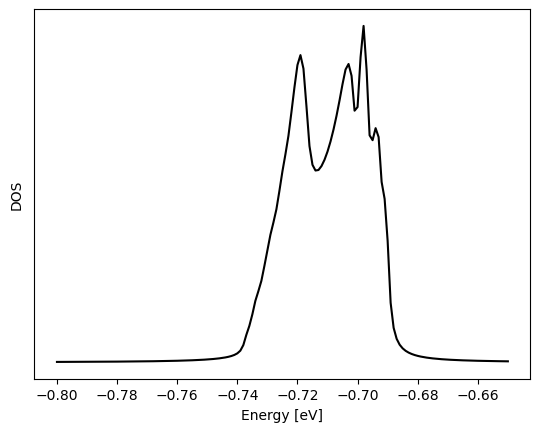

In [16]:
EDOSv, aDOSv = KPpack.DOS(-0.8,-0.65,0.001,EvqwBand,2e-3);
KPpack.PlotDOS(EDOSv,aDOSv);

## DOS Conduction Band

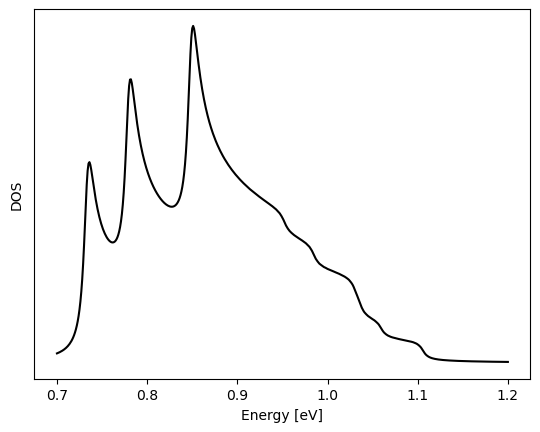

In [17]:
EDOSc, aDOSc = KPpack.DOS(0.7,1.2,0.001,EcqwBand,1e-2);
KPpack.PlotDOS(EDOSc,aDOSc);

## =====================================================|

# Envelope functions magnitude

# ================================

## Components of First Conduction band (CB)

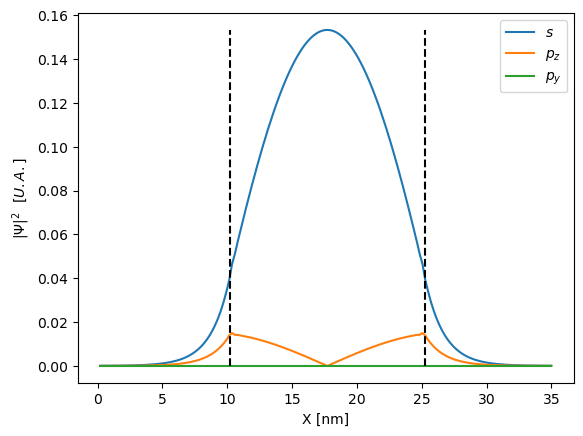

0.7330001679893281

In [38]:
iVec=2;vecband=[1,4,3]; legendArr=[L"s",L"p_z",L"p_y"]

KPpack.plotProbDistr(iVec,pos,EVqw0,siz,vecband,boundary,X,legendArr)
Eqw0[pos+iVec]

## Components of Second Conduction band (CB)

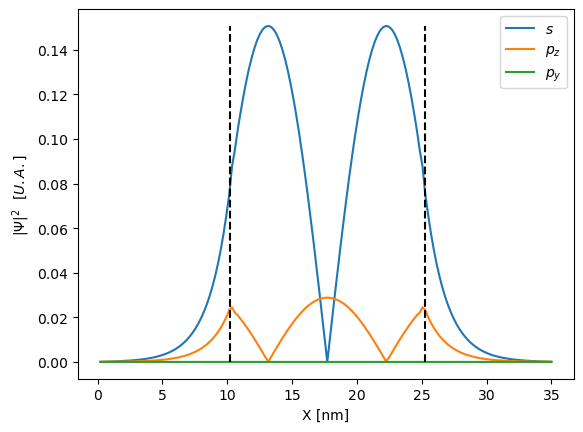

0.7789378746062114

In [35]:
iVec=4;vecband=[5,8,7]; legendArr=[L"s",L"p_z",L"p_y"]

KPpack.plotProbDistr(iVec,pos,EVqw0,siz,vecband,boundary,X,legendArr)
Eqw0[pos+iVec]

## Components of First Light Hole band (HL)

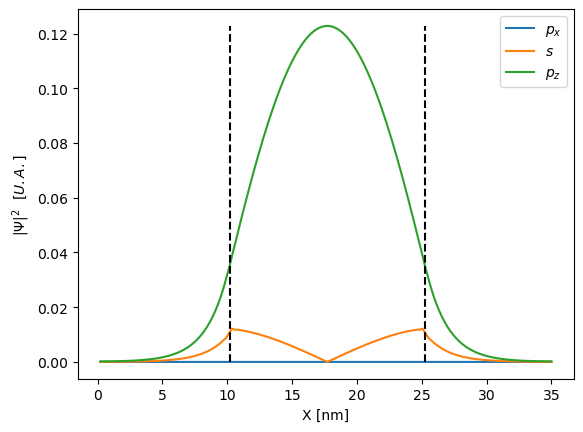

In [44]:
iVec=-3;vecband=[2,1,4]; legendArr=[L"p_x",L"s",L"p_z"]

KPpack.plotProbDistr(iVec,pos,EVqw0,siz,vecband,boundary,X,legendArr)

# ======================================================

# Surfaces of valence band quantum Well

In [21]:
kinic,kend=-1.0,1.0; kstep=0.1
@time EArrv=KPpack.eigenSurface(H0,H1r,H1l,H2,mlayer,dx,c,cps,Npts,Emomentum,pb,cr,s,sV,nv,kinic,kend,kstep);

 58.329367 seconds (40.58 M allocations: 19.964 GiB, 5.65% gc time, 0.53% compilation time)


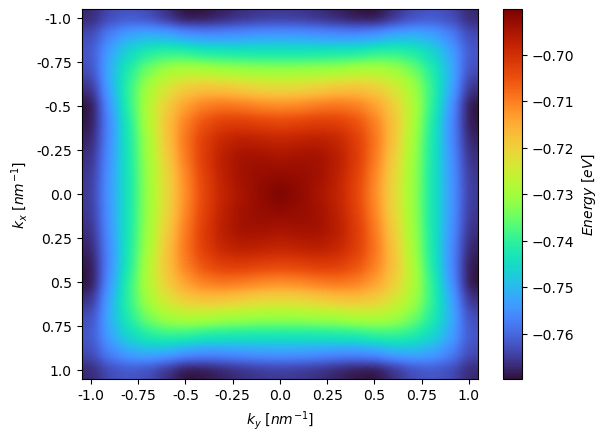

In [22]:
KPpack.plotEigSurface(EArrv,1,kinic,kend)

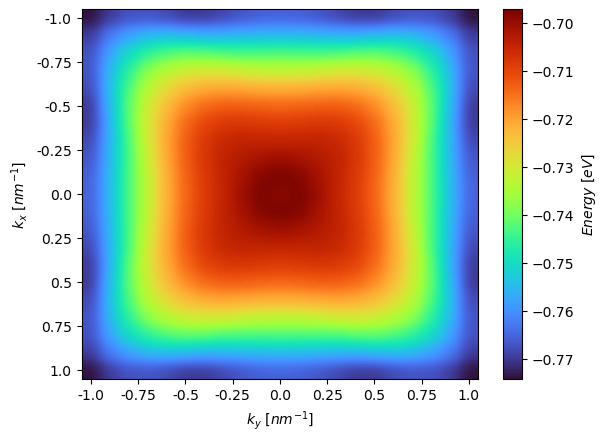

In [23]:
KPpack.plotEigSurface(EArrv,3,kinic,kend)

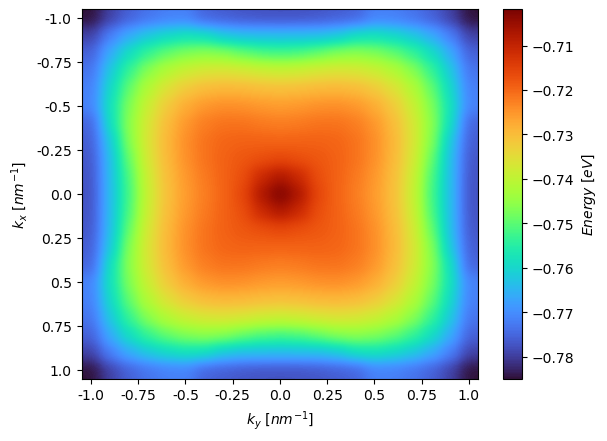

In [24]:
KPpack.plotEigSurface(EArrv,5,kinic,kend)

# Surfaces of conduction band quantum Well

In [25]:
kinic,kend=-1.0,1.0; kstep=0.1
@time EArr=KPpack.eigenSurface(H0,H1r,H1l,H2,mlayer,dx,c,cps,Npts,Emomentum,pb,cr,s,sC,nc,kinic,kend,kstep);

 76.691881 seconds (40.63 M allocations: 21.390 GiB, 5.24% gc time)


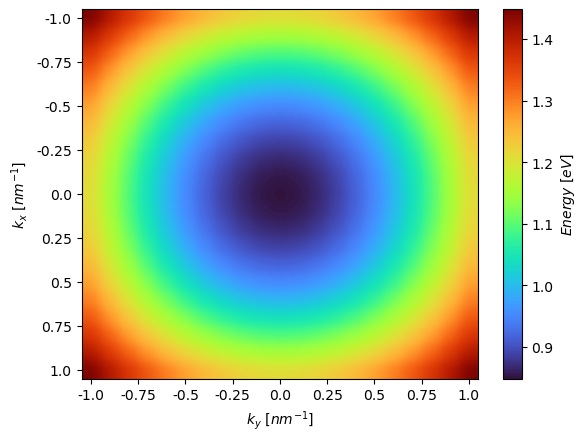

In [26]:
KPpack.plotEigSurface(EArr,1,kinic,kend)

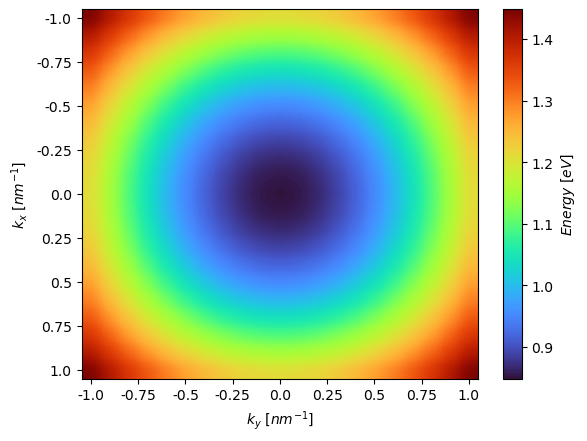

In [27]:
KPpack.plotEigSurface(EArr,2,kinic,kend)